## MESA dataset processing example

We will need `NumPy` for array processing, `MatPlotLib` for plots and the `operator` is required for my method of sorting multidimensional arrays.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import operator

%matplotlib inline

Solar luminosity to present luminosity-temperature diagrams in their conventional form. The dataset itself stores luminosities in SI.

In [11]:
solar_lum = 3.826e26       # SI [W]

A helper function to obtain isochrones for any physical parameters from the dataset. The function performs linear interpolation to obtain ages that are not directly available. If an age outside of the range is requested, a warning will be shown.

In [8]:
def get_isochrone(mass_all, age_all, age, dependent):
    """
    Generate an isochrone for a MESA grid as a function of mass. All values of MESA masses,
    ages and dependent variables (e.g. temperature, luminosity and the like) are expected in
    "mass_all", "age_all" and "dependent". "dependent" is a list of NumPy arrays. Every NumPy array in
    "dependent" as well as "mass_all" and "age_all" must have the same dimension.
    "age" is the age of the required isochrone.
    Returns a list of NumPy arrays, where the zeroth entry is the independent variable (mass) and
    every subsequent element is dependent variables in the same order as they are provided in "dependent".
    """
    mass_unique = sorted(list(set(mass_all)))
    output = np.zeros([len(dependent), len(mass_unique)])
    for i, mass in enumerate(mass_unique):
        for j, quantity in enumerate(output):
            L = sorted(zip(age_all[mass_all == mass], dependent[j][mass_all == mass]), key = operator.itemgetter(0))
            L = np.array(zip(*L))
            if age > max(L[0]) or age < min(L[0]):
                warnings.warn("The age requested is outside of the grid ({},{},{})".format(min(L[0]), age, max(L[0])))
            output[j, i] = np.interp(age, *L)
    return [mass_unique] + list(output)

Load the dataset using standard `NumPy` file operations.

In [9]:
filename = 'mesa/omega_cen_regular.dat'       # Point this to your MESA datafile

# Load the data
mesa_r, mesa_t, mesa_l, mesa_a, mesa_m = np.loadtxt(filename, unpack = True, delimiter = ',')

Use `MatPlotLib` to plot a few isochrones.

(-0.5, 0.6)

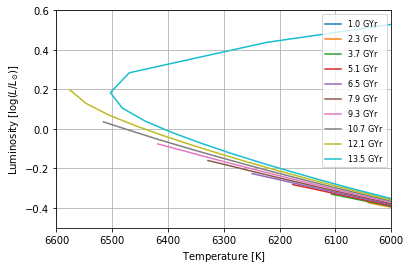

In [13]:
isochrones = np.linspace(1.0e9, 13.5e9, 10)
for index, isochrone in enumerate(isochrones):
    iso_m, iso_t, iso_l = get_isochrone(mesa_m, mesa_a, isochrone, [mesa_t, mesa_l])
    plt.plot(iso_t, np.log10(iso_l  / solar_lum), '-', ms = 3, label = '$' + str(int(isochrone / 1e8)/10.0) + '\ \mathrm{GYr}$')
plt.xlabel('Temperature [$\mathrm{K}$]')
plt.ylabel('Luminosity [$\log(L/L_{\odot})$]')
plt.grid()
plt.gca().invert_xaxis()
plt.legend(fontsize = 8)
plt.xlim(6600, 6000)
plt.ylim(-0.5, 0.6)

Plot evolutionary tracks.

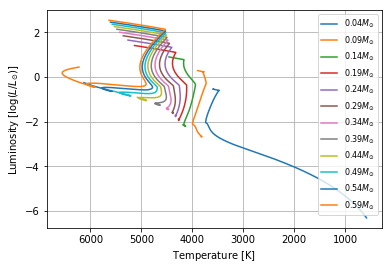

In [15]:
mass_unique = sorted(list(set(mesa_m)))
for mass in mass_unique[::10]:
    plt.plot(mesa_t[mass == mesa_m], np.log10(mesa_l[mass == mesa_m]  / solar_lum), '-', label = '$' + str(mass) + 'M_{\odot}$')
plt.xlabel('Temperature [$\mathrm{K}$]')
plt.ylabel('Luminosity [$\log(L/L_{\odot})$]')
plt.grid()
plt.gca().invert_xaxis()
plt.legend(fontsize = 8)